# Convolutional Neural Netowrk to predict images from CIFAR-10 dataset

In this lecture we are going to learn about CNN (Convolutional Neural Networks).
We will learn how to build and how to use them to make predictions.

The dataset of today's classification task is: CIFAR-10 https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow import keras
from keras.utils import plot_model

### Dataset loading and some data preprocessing

In [3]:
# Loading CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# print dataset shape and a single image shape
print("Train dataset shape:", x_train.shape)
print("Single image shape:", x_train[0].shape)

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255
x_test =  x_test.astype("float32") / 255

print("Train label shape:", y_train.shape)
print("Unique labels: ", np.unique(y_train))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step
Train dataset shape: (50000, 32, 32, 3)
Single image shape: (32, 32, 3)
Train label shape: (50000, 1)
Unique labels:  [0 1 2 3 4 5 6 7 8 9]


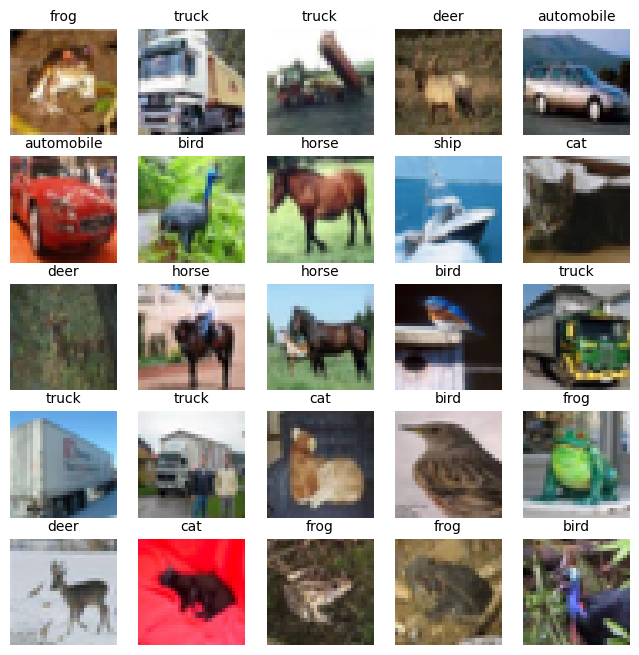

In [4]:
# Show the first 25 images in the dataset (in a grid 5x5) with the corresponding labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',     # We add the dataset labels just to understand better the output.
               'dog', 'frog', 'horse', 'ship', 'truck']             # They are provided in the dataset documentation


plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]], fontsize=10)
    plt.axis('off')

plt.show()

## Building the CNN

We are going to create a CNN model having these hidden layers:
1. `layer1`: conv2D having 32 filters of size 3x3, stride=1, ReLu activation
2. `layer2`: maxPool with filter size 2x2 and stride=1
3. `layer3`: conv2D having 64 filters of size 3x3, stride=1, ReLu activation
4. `layer4`: maxPool with filter size 2x2 and stride=1
5. `layer5`: conv2D having 64 filters of size 3x3, stride=1, ReLu activation,
6. `layer6`: MLP with 64 nodes

- **Keras sequential** documentation: https://keras.io/guides/sequential_model/
- **Keras documentation for Conv2D** class: https://keras.io/api/layers/convolution_layers/convolution2d/

In [5]:
# CNN model definition
model = Sequential([
    keras.Input(shape=(32,32,3)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding="same"),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output class
])

# Model architecture visualization
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

#### Visualize and plot the model architeture

In [6]:
!pip install visualkeras pydot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 47.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


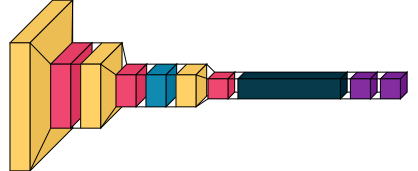

In [7]:
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk

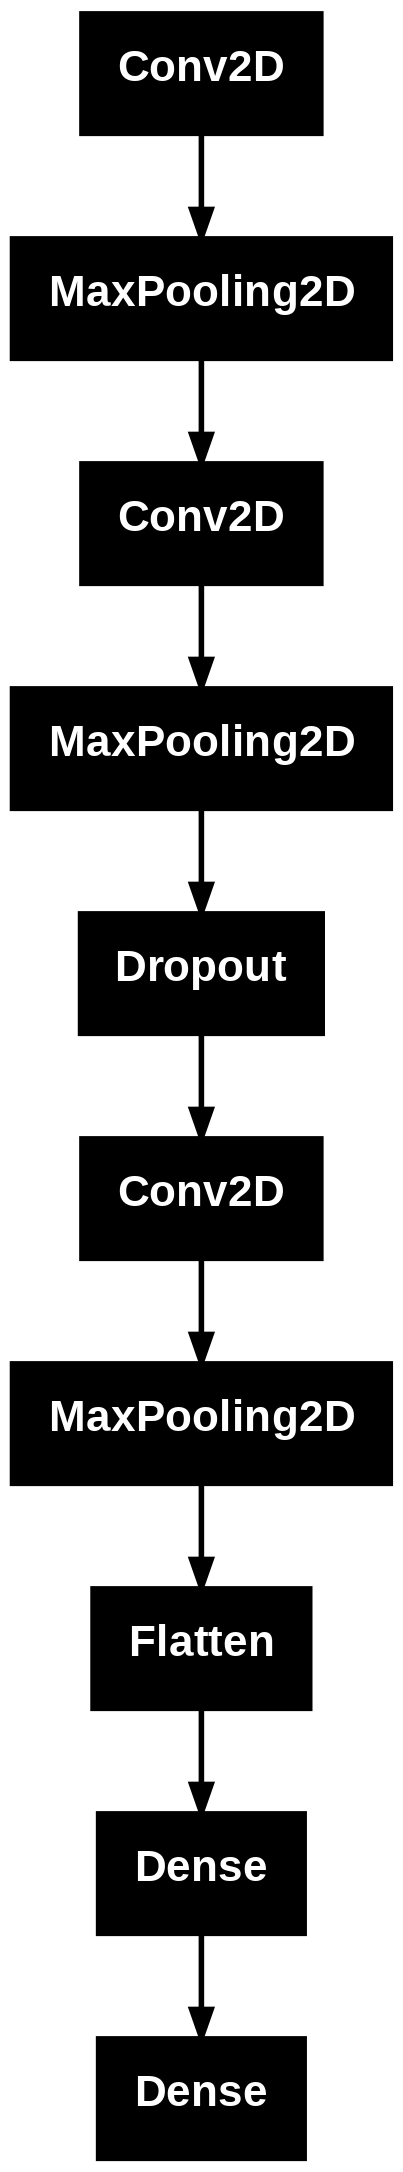

In [8]:
plot_model(model, to_file='model.png')

### CNN Training

In [9]:
# Compile the model
# Sparse Categorical Crossentropy is similar to Categorical Crossentropy but is designed for cases where the target labels are not one-hot encoded. Instead, the labels are represented as integers corresponding to the class indices. The true labels are integers, where each integer represents the class index.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
#history = model.fit(x_train, y_train, epochs=15, validation_data=(test_images, test_labels))
history = model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.3336 - loss: 1.7846
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5824 - loss: 1.1702
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6652 - loss: 0.9639
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6994 - loss: 0.8613
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7206 - loss: 0.7947
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7432 - loss: 0.7365
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7518 - loss: 0.7023
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7666 - loss: 0.6646
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7815 - loss: 0.6279
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7840 - loss: 0.6093
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7988 - loss: 0.5678
Epoch 12/15
1563/1563 ━━

### CNN evaluation

- All the training data have been stored in a **History** object.
- Its `History.history` attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values.
- If you don't remember how history is made you can run
    ```python
    type(history.history)
    ```
- Moreover, since it is a dictionary (a structure key:value) you can list the metrics stored in history (the keys) using
    ```python
    history.history.keys()
    ```

**Model evaluation**

In order to evaluate our model we want to:
- plot accuracy curve on training and validation sets
- test the model on the test set

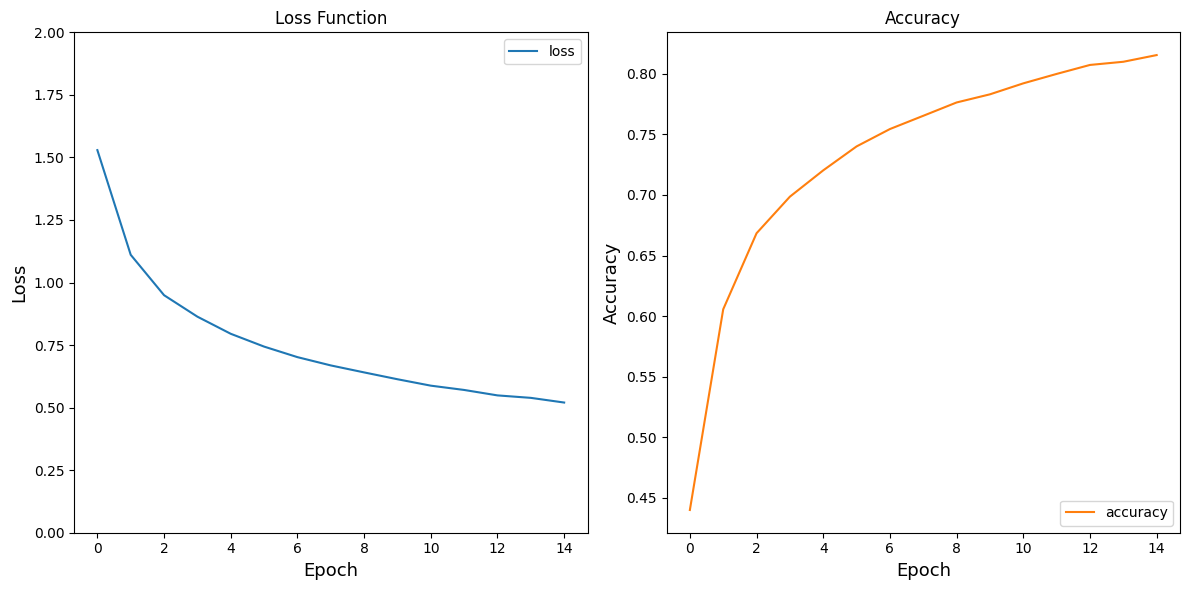

In [10]:
import matplotlib.pyplot as plt

# Degine a subplot grid 1x2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Plot for loss and val_loss
plt.title("Loss Function")
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Loss', fontsize=13)
plt.ylim([0.0, 2])
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)

# Plot for accuracy and val_accuracy
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label='accuracy', color='tab:orange')
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [11]:
# Model evaluation on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Loss on test set: {test_loss}')
print(f'Accuracy on test set: {test_accuracy*100}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7522 - loss: 0.7455
Loss on test set: 0.7591298818588257
Accuracy on test set: 74.70999956130981%


### Confusion matrix

- A confusion matrix is a performance measurement tool used in classification tasks, to evaluate the performance of a classification model.
- It is a square matrix where each row represents the instances in a predicted class, and each column represents the instances in an actual class (or vice versa).
- The diagonal elements of the matrix represent the number of correct predictions for each class, while the off-diagonal elements represent incorrect predictions.

By analyzing the confusion matrix, we can gain insights into the model's performance, such as:
- `Accuracy`: The overall accuracy of the model, calculated as the ratio of the sum of correct predictions to the total number of predictions.
- `Precision`: The ratio of true positive predictions to the total number of positive predictions, indicating the model's ability to correctly identify positive cases.
- `Recall`: The ratio of true positive predictions to the total number of actual positive cases, indicating the model's ability to capture all positive cases.
- `F1 Score`: The harmonic mean of precision and recall, providing a balance between the two metrics.

Overall, the confusion matrix provides a comprehensive overview of the model's performance across different classes, enabling us to identify areas for improvement and fine-tuning.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


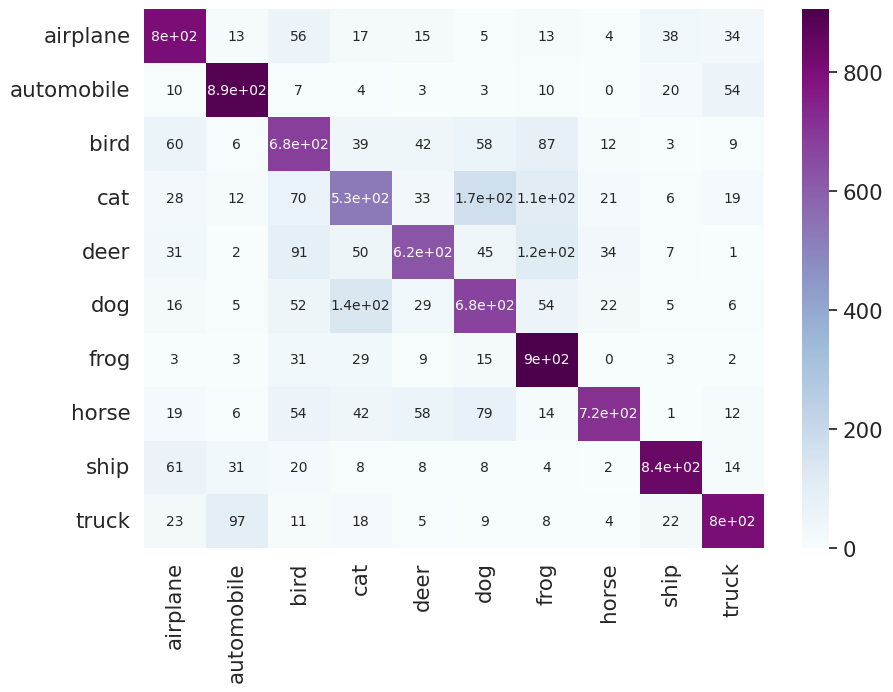

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sn    # https://seaborn.pydata.org/
import pandas  as pd

y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

df_cm = pd.DataFrame(matrix, class_names, class_names)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4) #for label size
sn.heatmap(df_cm, cmap="BuPu",annot=True,annot_kws={"size": 10})# font size
plt.show()

In [13]:
# save model
model.save('model_cnn.h5')

### Plot the learned Filters

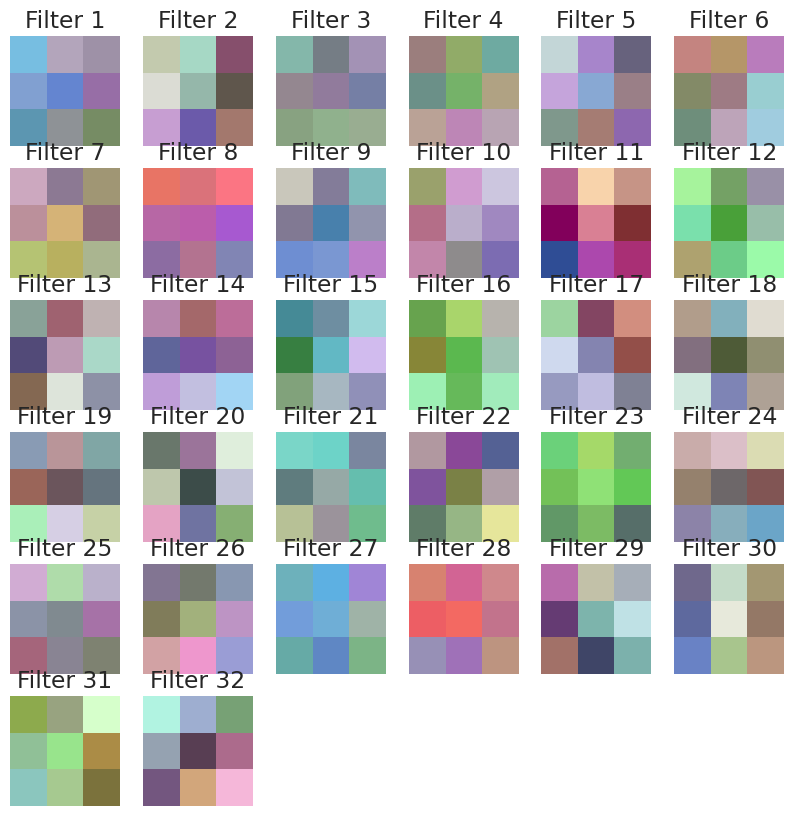

In [14]:
# Extracting the weights of the first convolutional layer
conv_weights, conv_biases = model.layers[0].get_weights()

# Normalizing the weights to [0, 1] to make them easy to visualize.
conv_weights_normalized = (conv_weights - np.min(conv_weights)) / (np.max(conv_weights) - np.min(conv_weights))

# Plotting the learned filters
plt.figure(figsize=(10, 10))
for i in range(conv_weights.shape[-1]):
    plt.subplot(6, 6, i + 1)
    plt.imshow(conv_weights_normalized[:, :, :, i], cmap='gray')
    plt.axis('off')
    plt.title(f'Filter {i+1}')
plt.show()

### **Visualize the feature maps**
Feature maps are the **representations of features extracted from the input image at each level of the CNN**.

To visualize the latent features computed by a convolutional layer for a given image, you have to extract the output values of that layer.

To do this:
- you need to create a new model with the same input as the original model and the layer you want to analyze as the output layer.
- once you have this new model, you can call it on the image you want to visualize, and it will output the feature maps for that specific layer.

This can help you understand what features the model is detecting in the image and how it is processing the input data.

To access the layers, you can use  `model.layers`

In [15]:
# Print the name and shape of the conv layers
print(type(model.layers))
print(model.layers[0])

for layer in model.layers:
#for i in range(len(model.layers)):
	#layer = model.layers[i]
	if "conv" in layer.name:
		print(i, layer.name, layer.output.shape)


<class 'list'>
<Conv2D name=conv2d, built=True>
31 conv2d (None, 32, 32, 32)
31 conv2d_1 (None, 16, 16, 64)
31 conv2d_2 (None, 8, 8, 64)


1. Show the feature maps extracted by the first conv layer
2. Build a new model to output right after the first hidden layer

In [16]:
# You can get the model by its name, but consider that the names assigned change if you re-run the code
# It's better to select the layer using the list index
model_v = keras.Model(inputs  = model.inputs, outputs = model.layers[0].output)
model_v.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Get the feature maps for an image
im = x_train[14]
feature_maps = model_v.predict(im.reshape(1,32,32,3))   # reshape method is necessary because
                                                        # train_images[k] has the shape (32,32,3) while predict
                                                        # wants a 4d input. Using reshape, we can create
                                                        # a 4d array having just 1 element
# Print the shape of feature_maps
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 32, 32, 3))
  warnings.warn(msg)


(1, 32, 32, 32)


truck


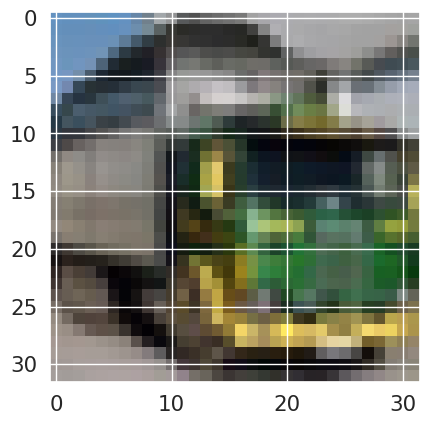

In [18]:
# Show the image for which we want to compute the feature maps and its class
plt.imshow(im)
print(class_names[y_train[14].item()])

(32, 32)


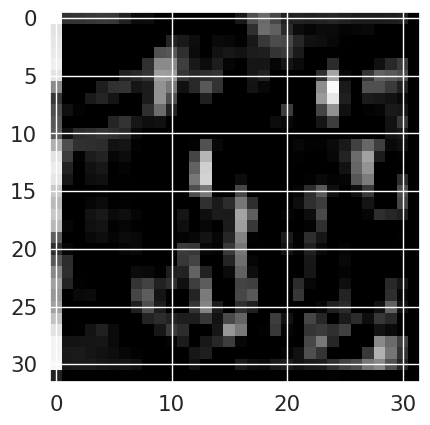

In [19]:
# Show the feature map corresponding to the 5th filter as an image
# Remember that feature_maps.shape = (1, 32, 32, 32) where the 4th entry represents the filters
fmap = feature_maps[0,:,:,5]
print(fmap.shape)

plt.imshow(fmap,cmap="gray")

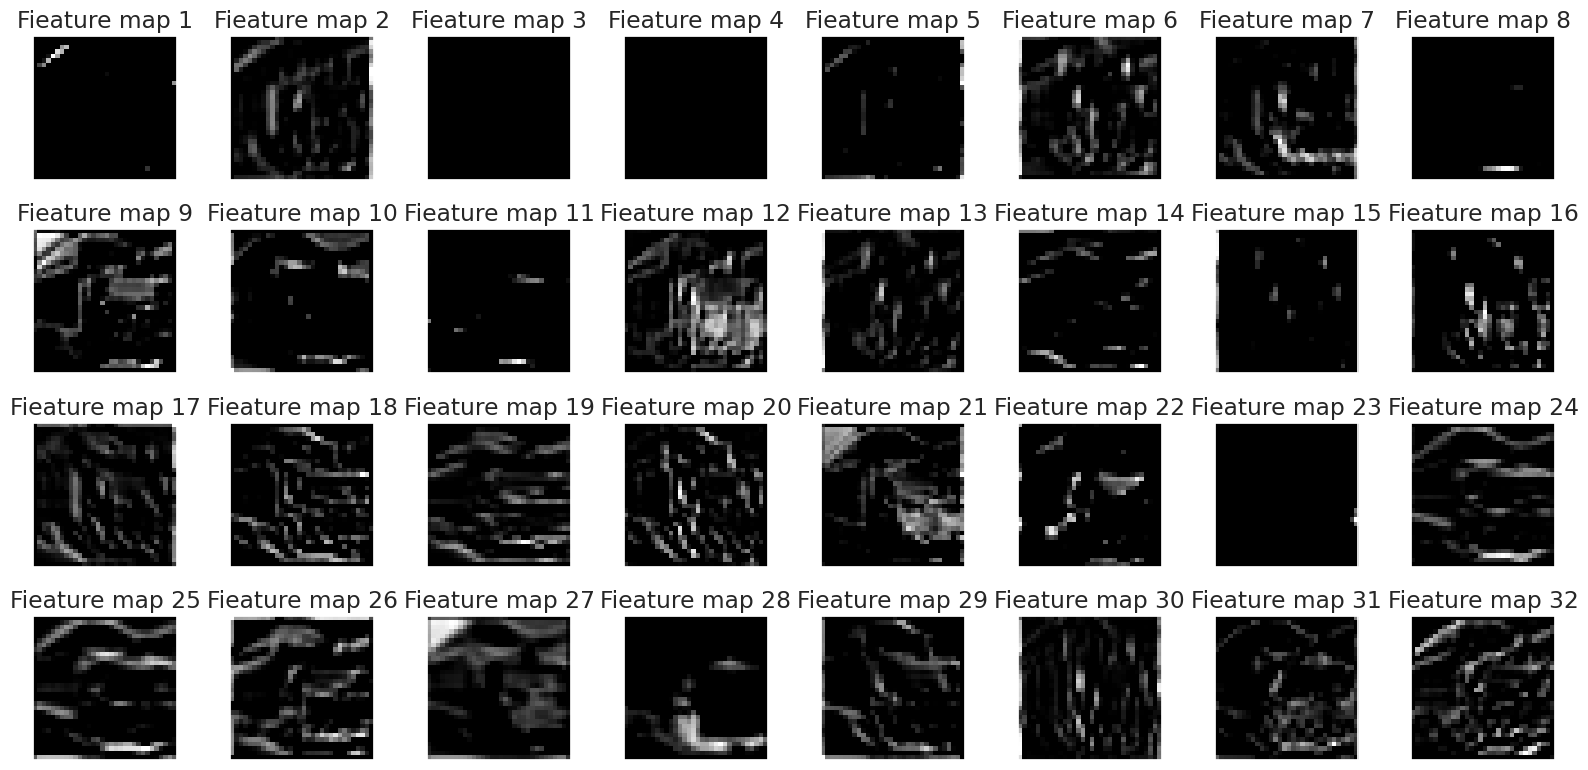

In [20]:
# Show all the feature maps
import matplotlib as mpl
fig  = plt.figure(figsize=(16,8))

for i in range(32):
    sub = fig.add_subplot(4,8, i+1)
    plt.xticks([])
    plt.yticks([])
    sub.imshow(feature_maps[0,:,:,i], cmap = "gray")
    sub.set_title(f"Fieature map {i+1}")

plt.tight_layout()
plt.show()